In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/gender/Training/"
test_dir = "/content/drive/MyDrive/gender/Validation/"



# Using imagedatagenerator to access the files and image augmentation.

# You can change the setting of imageDataGenerator for other augmentation methods.

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


training_generator = train_datagen.flow_from_directory(train_dir,
                                                      target_size=(100, 100),
                                                      class_mode="binary")


test_generator = test_datagen.flow_from_directory(test_dir,
                                                       target_size=(100, 100),
                                                       class_mode="binary")




Found 22667 images belonging to 2 classes.
Found 5472 images belonging to 2 classes.


In [ ]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

%matplotlib inline

در زیر مدل تعریف شده و عملیات اموزش روی ان انجام شده 

In [ ]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(84, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


مدلی که در بالا تعریف شده طی دو مرحله و با روش های مختلف آموزش داده شده که در یک روش از چک پوینت و استفاده شده و در روش دیگر بدون چک پوینت و ارلی استاپینگ مدل اموزش دیده 

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/finalmodel.h5",monitor = "val_accuracy",save_best_only = True,verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=5,verbose=1)

در زیر مدل مجدد با استفاده از ویزگی های کنترلی اموزش دیده و از وزن هایی که در مدل بعدی بدست امده مقدار دهی اولیه شده و استفاده شده تا سرعت   و دقت افزایش یابد در اینجا از چک پوینت برای نگه داری بهترین دقت و ذخیره ی پارامتر های شبکه استفاده شده 

In [ ]:
batch_size =128
history = model.fit(training_generator,steps_per_epoch = 22667 //batch_size ,epochs=10,
                              validation_data = test_generator,validation_steps = 5472  //batch_size,
                              callbacks = [checkpoint,earlystop],verbose=1)

Epoch 1/10
177/177 [==============================] - 2178s 12s/step - loss: 0.1389 - accuracy: 0.9558 - val_loss: 0.1407 - val_accuracy: 0.9449

Epoch 00001: val_accuracy improved from -inf to 0.94494, saving model to /content/drive/MyDrive/finalmodel.h5
Epoch 2/10
177/177 [==============================] - 1617s 9s/step - loss: 0.1228 - accuracy: 0.9516 - val_loss: 0.1209 - val_accuracy: 0.9576

Epoch 00002: val_accuracy improved from 0.94494 to 0.95759, saving model to /content/drive/MyDrive/finalmodel.h5
Epoch 3/10
177/177 [==============================] - 1229s 7s/step - loss: 0.1137 - accuracy: 0.9610 - val_loss: 0.1324 - val_accuracy: 0.9568

Epoch 00003: val_accuracy did not improve from 0.95759
Epoch 4/10
177/177 [==============================] - 938s 5s/step - loss: 0.1181 - accuracy: 0.9609 - val_loss: 0.1245 - val_accuracy: 0.9516

Epoch 00004: val_accuracy did not improve from 0.95759
Epoch 5/10
177/177 [==============================] - 696s 4s/step - loss: 0.1101 - acc

In [ ]:
history = model.fit_generator(training_generator, steps_per_epoch=100, epochs=20,
                    validation_data=test_generator,
                    validation_steps=20,
                    verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 874s 9s/step - loss: 0.6921 - accuracy: 0.5313 - val_loss: 0.5062 - val_accuracy: 0.7188
Epoch 2/20
100/100 [==============================] - 740s 7s/step - loss: 0.4852 - accuracy: 0.7886 - val_loss: 0.2393 - val_accuracy: 0.9094
Epoch 3/20
100/100 [==============================] - 631s 6s/step - loss: 0.2868 - accuracy: 0.8899 - val_loss: 0.3969 - val_accuracy: 0.8297
Epoch 4/20
100/100 [==============================] - 553s 6s/step - loss: 0.2615 - accuracy: 0.8918 - val_loss: 0.1753 - val_accuracy: 0.9328
Epoch 5/20
100/100 [==============================] - 481s 5s/step - loss: 0.2166 - accuracy: 0.9169 - val_loss: 0.1951 - val_accuracy: 0.9281
Epoch 6/20
100/100 [==============================] - 402s 4s/step - loss: 0.1932 - accuracy: 0.9270 - val_loss: 0.1600 - val_accuracy: 0.9375
Epoch 7/20
100/100 [==============================] - 352s 4s/step - loss: 0.1948 - accuracy: 0.9254 - val_loss: 0.2391 - val_accuracy: 0.9031

In [ ]:
#model.save('/content/drive/MyDrive/nn.h5')
model = keras.models.load_model('/content/drive/MyDrive/finalmodel.h5')

نمودار دقت و خطای زیر برای حالت دوم ترین با استفاده از چک پوینت رسم شده 

<Figure size 432x288 with 0 Axes>

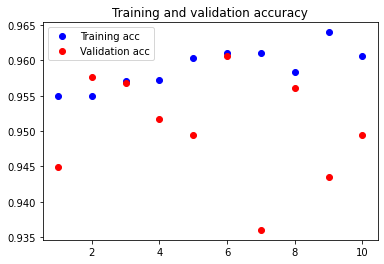

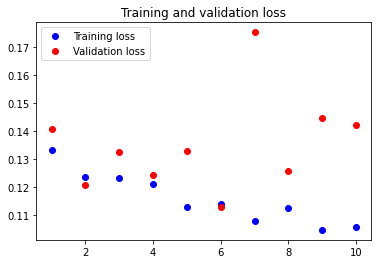

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

دقت روی داده های تست با استفاده از مدل زمانیکه برای بار اول ترین شده به صورت زیر است 

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
print('test_loss:',test_loss)

171/171 [==============================] - 107s 627ms/step - loss: 0.1757 - accuracy: 0.9315
test acc: 0.9314693212509155
test_loss: 0.17567229270935059


دقت مدل روی داده های تست زمانیکه برای بار دوم با استفاده از چک پوینت و استفاده از وزن های بدست امده در بار اول ترین شده به صورت زیر است 
و مدل به دقت 95 درصد رسیده 


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
print('test_loss:',test_loss)

171/171 [==============================] - 102s 601ms/step - loss: 0.1226 - accuracy: 0.9572
test acc: 0.9572368264198303
test_loss: 0.12261813133955002


در ادامه مدل با استفاده از روش های نرمالیزیشن اموزش داده شده و دقت با دقت بدست امده از مدل قبل تغییری نداشته 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(100, 100, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(84, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/modeldropout.h5",monitor = "val_accuracy",save_best_only = True,verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=5,verbose=1)

In [ ]:
batch_size =128
history = model.fit(training_generator,steps_per_epoch = 22667 //batch_size ,epochs=5,
                              validation_data = test_generator,validation_steps = 5472  //batch_size,
                              callbacks = [checkpoint,earlystop],verbose=1)

Epoch 1/5
177/177 [==============================] - 2100s 12s/step - loss: 0.1156 - accuracy: 0.9631 - val_loss: 0.1309 - val_accuracy: 0.9516

Epoch 00001: val_accuracy improved from -inf to 0.95164, saving model to /content/drive/MyDrive/modeldropout.h5
Epoch 2/5
177/177 [==============================] - 1570s 9s/step - loss: 0.1126 - accuracy: 0.9573 - val_loss: 0.1304 - val_accuracy: 0.9457

Epoch 00002: val_accuracy did not improve from 0.95164
Epoch 3/5
177/177 [==============================] - 1150s 7s/step - loss: 0.1293 - accuracy: 0.9524 - val_loss: 0.1441 - val_accuracy: 0.9449

Epoch 00003: val_accuracy did not improve from 0.95164
Epoch 4/5
177/177 [==============================] - 860s 5s/step - loss: 0.1311 - accuracy: 0.9512 - val_loss: 0.1354 - val_accuracy: 0.9561

Epoch 00004: val_accuracy improved from 0.95164 to 0.95610, saving model to /content/drive/MyDrive/modeldropout.h5
Epoch 5/5
177/177 [==============================] - 665s 4s/step - loss: 0.1204 - accu

# یادگیری انتقا لی

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/gender/Training/"
test_dir = "/content/drive/MyDrive/gender/Validation/"


# Using imagedatagenerator to access the files and image augmentation.

# You can change the setting of imageDataGenerator for other augmentation methods.

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


training_generator = train_datagen.flow_from_directory(train_dir,
                                                      target_size=(224, 224),
                                                      class_mode="binary")


test_generator = test_datagen.flow_from_directory(test_dir,
                                                       target_size=(224, 224),
                                                       class_mode="binary")


Found 22667 images belonging to 2 classes.
Found 5472 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
target_size = (224, 224)
batch_size = 128
mode = 'binary'

برای یادگیری انتقالی از مدل وی جی جی 16 استفاده شده و مدل طبق زیر تعریف شده است 

In [ ]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.trainable = False

In [ ]:
model_with_tuning = 'besttune_model.h5'
checkpoint_callback = ModelCheckpoint(model_with_tuning,
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy',patience=5,verbose=1)

In [ ]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
             metrics=['accuracy'],
             optimizer='adam')

In [ ]:
history_without_tuning = model.fit(training_generator,
                   steps_per_epoch=22667  // batch_size,
                   epochs=6,
                   validation_data=test_generator,
                   validation_steps=5472 // batch_size,
                   verbose=1,
                   callbacks = [checkpoint_callback,earlystop])

Epoch 1/6
177/177 [==============================] - 1483s 8s/step - loss: 0.6157 - accuracy: 0.8184 - val_loss: 0.3536 - val_accuracy: 0.8549

Epoch 00001: val_accuracy improved from -inf to 0.85491, saving model to besttune_model.h5
Epoch 2/6
177/177 [==============================] - 1100s 6s/step - loss: 0.1918 - accuracy: 0.9285 - val_loss: 0.1391 - val_accuracy: 0.9487

Epoch 00002: val_accuracy improved from 0.85491 to 0.94866, saving model to besttune_model.h5
Epoch 3/6
177/177 [==============================] - 821s 5s/step - loss: 0.1499 - accuracy: 0.9404 - val_loss: 0.1437 - val_accuracy: 0.9494

Epoch 00003: val_accuracy improved from 0.94866 to 0.94940, saving model to besttune_model.h5
Epoch 4/6
177/177 [==============================] - 620s 4s/step - loss: 0.1508 - accuracy: 0.9472 - val_loss: 0.1668 - val_accuracy: 0.9330

Epoch 00004: val_accuracy did not improve from 0.94940
Epoch 5/6
177/177 [==============================] - 470s 3s/step - loss: 0.1213 - accuracy:

مدل با استفاده از یادگیری انتقالی به دقت 95 درصد رسیده 

In [ ]:
!pip install MTCNN

# تست شبکه با تصاویر

تصویر من به عنوان نمونه به شبکه داده شده و با دقت 100 درصد جنسیت درست تشخیص داده شده 

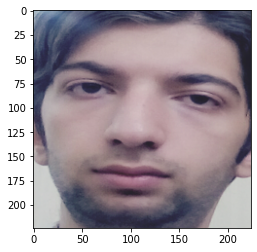

In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_preprocessing.image import save_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
 

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('/content/drive/MyDrive/me.jpg')
# plot the extracted face
pyplot.imshow(pixels)
save_img('/content/drive/MyDrive/c1.jpg', pixels)
# show the plot
pyplot.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test = "/content/drive/MyDrive/me/"


test_data = ImageDataGenerator(rescale=1/255)


test_generator = test_data.flow_from_directory(test,
                                              target_size=(100, 100),
                                              class_mode="binary")

Found 1 images belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
print('test_loss:',test_loss)

1/1 [==============================] - 0s 277ms/step - loss: 0.0017 - accuracy: 1.0000
test acc: 1.0
test_loss: 0.0017139650881290436


20 تصویر از
بازیگران به شبکه داده شده  و با استفاده از کتابخانه ی mtcnn
ابتدا تصویر صورت استخراج شده و به شبکه داده شده است 

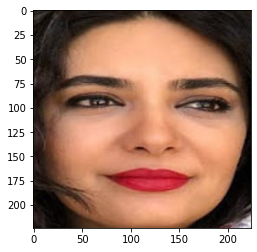

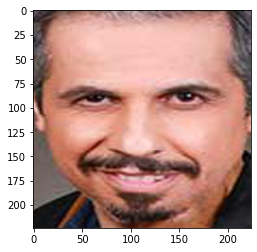

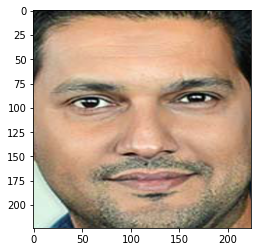

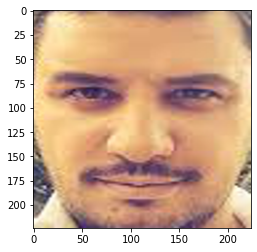

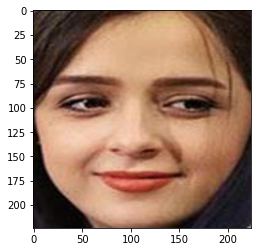

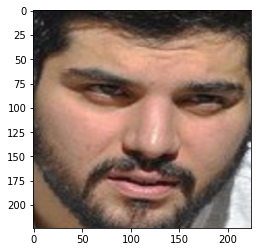

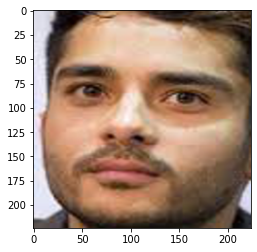

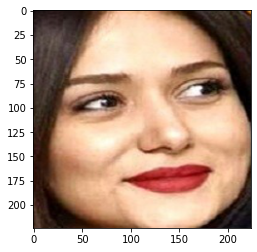

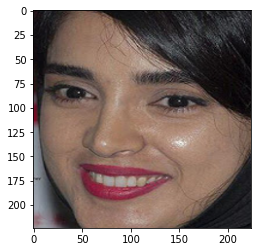

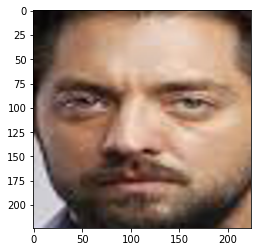

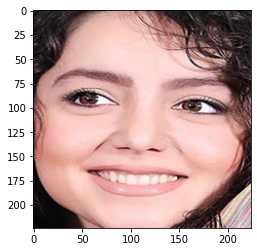

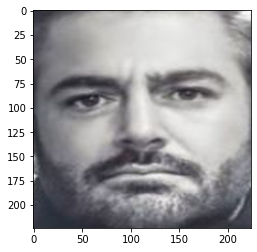

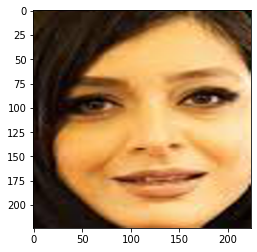

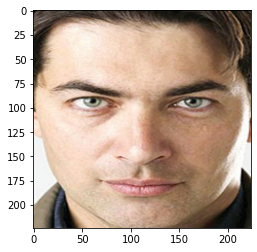

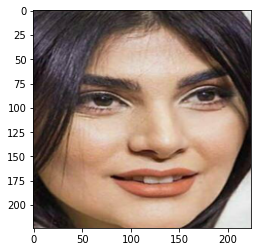

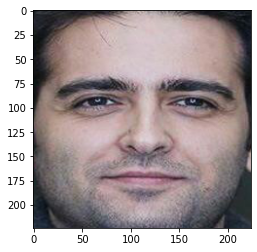

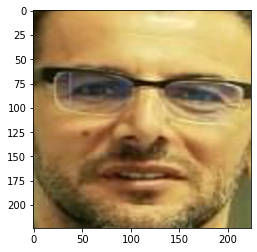

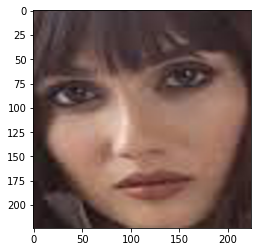

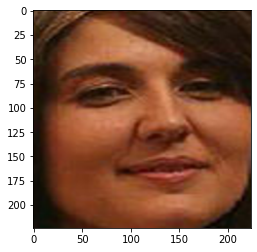

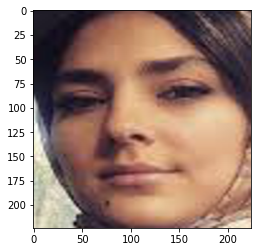

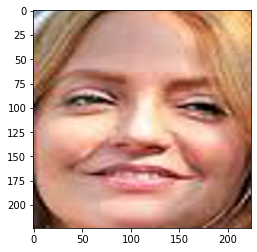

In [ ]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_preprocessing.image import save_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
 

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
for i in range(1, 22): 
  pixels = extract_face('/content/drive/MyDrive/p/%d.jpg'%i)
  # plot the extracted face
  pyplot.imshow(pixels)
  save_img('/content/drive/MyDrive/pic/%d.jpg'%i, pixels)
  # show the plot
  pyplot.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test = "/content/drive/MyDrive/pic/"


test_data = ImageDataGenerator(rescale=1/255)


test_generator = test_data.flow_from_directory(test,
                                              target_size=(100, 100),
                                              class_mode="binary")

Found 20 images belonging to 2 classes.


شبکه روی 20 تصویر داده شده با دقت 95 درصد جنسیت را تشخیص داده است 

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)
print('test_loss:',test_loss)

1/1 [==============================] - 7s 7s/step - loss: 0.0461 - accuracy: 0.9500
test acc: 0.949999988079071
test_loss: 0.046058472245931625
